In [28]:
!pip install scikit-fuzzy

In [29]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data = pd.read_csv('daily_weather.csv')

In [31]:
# Analyze the data to find the best parameter values for membership functions
relative_humidity = data['relative_humidity_9am']
relative_humidity.describe()

count    1095.000000
mean       34.241402
std        25.472067
min         6.090000
25%        15.092243
50%        23.179259
75%        45.400000
max        92.620000
Name: relative_humidity_9am, dtype: float64

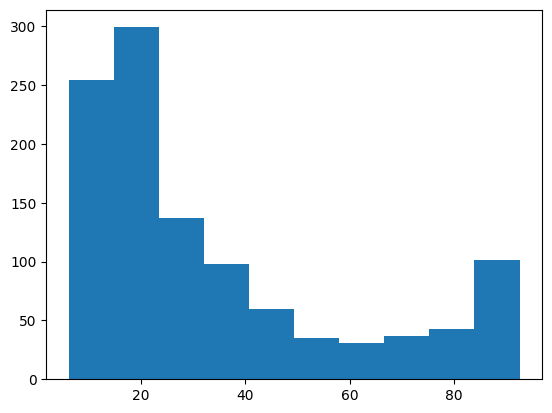

In [32]:
plt.hist(relative_humidity)
plt.show()

In [33]:
# Trapezoidal membership function
trapezoidal_params = np.arange(0, 102, 12.5)
best_lower1, best_peak1, best_peak2, best_upper1 = (6, 34, 45, 92)

In [34]:
# Gaussian membership function
gaussian_params = np.arange(0, 51, 5)
best_mean1, best_sigma1 = 34, 25
best_mean2, best_sigma2 = 40, 10

In [35]:
# Antecedent and Consequent object for the FIS
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
humidity['low'] = fuzz.trapmf(humidity.universe, [0, 0, best_lower1, best_peak1])
humidity['medium'] = fuzz.trapmf(humidity.universe, [best_lower1, best_peak1, best_peak2, best_upper1])
humidity['high'] = fuzz.trapmf(humidity.universe, [best_peak2, best_upper1, 100, 100])

In [36]:
# Define the Consequent
output = ctrl.Consequent(np.arange(0, 101, 1), 'output')
output['low'] = fuzz.trimf(output.universe, [0, 25, 50])
output['medium'] = fuzz.trimf(output.universe, [25, 50, 75])
output['high'] = fuzz.trimf(output.universe, [50, 75, 100])

In [37]:
# Create 10 rules for the FIS
rules = []

# Rules
rules.append(ctrl.Rule(humidity['low'], output['low']))
rules.append(ctrl.Rule(humidity['medium'], output['medium']))
rules.append(ctrl.Rule(humidity['high'], output['high']))

rules.append(ctrl.Rule(humidity['low'] & output['medium'], output['low']))
rules.append(ctrl.Rule(humidity['low'] & output['high'], output['medium']))

rules.append(ctrl.Rule(humidity['medium'] & output['low'], output['medium']))
rules.append(ctrl.Rule(humidity['medium'] & output['medium'], output['medium']))
rules.append(ctrl.Rule(humidity['medium'] & output['high'], output['high']))

rules.append(ctrl.Rule(humidity['high'] & output['low'], output['medium']))
rules.append(ctrl.Rule(humidity['high'] & output['medium'], output['high']))

In [38]:
# ControlSystemSimulation object
sim = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))

In [39]:
# Provide input values
sim.input['humidity'] = 70

# Calculate the results using the FIS for different membership functions
sim.compute()

In [40]:
output_triangular = sim.output['output']

# Print or visualize the output for comparison
print("Output (Triangular):", output_triangular)

Output (Triangular): 63.138607927741056


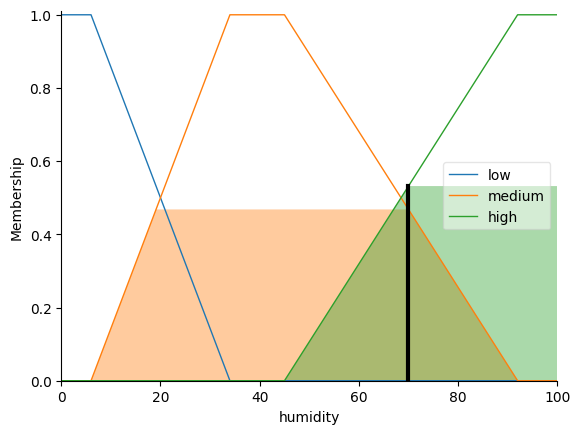

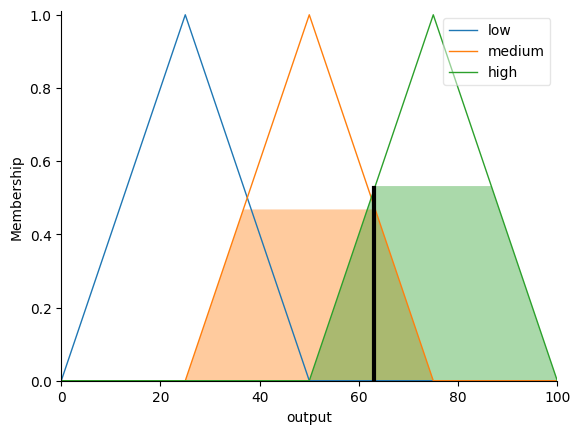

In [41]:
# Plot the membership functions
humidity.view(sim=sim)
output.view(sim=sim)
plt.show()